#Usage of python to show the relations between a DEM data and above-ground biomass density and visualize it.

###Download DEM data from the SRTM mission. Four(4) regions of Bangladesh centering Dhaka as capital was selected.

 * South East (srtm_55_08.tif) 
 * South East (srtm_54_08.tif) 
 * North West (srtm_54_07.tif)
 * North East (srtm_55_07.tif) 

In [ ]:
%%capture
!wget http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_55_08.zip #SE
#!wget http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_54_08.zip #SW
#!wget http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_54_07.zip #NW
#!wget http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_55_07.zip #NE

In [ ]:
!wget http://globbiomass.org/wp-content/uploads/GB_Maps/N40E060_agb.zip

--2020-10-01 16:11:04--  http://globbiomass.org/wp-content/uploads/GB_Maps/N40E060_agb.zip
Resolving globbiomass.org (globbiomass.org)... 217.160.0.220, 2001:8d8:100f:f000::289
Connecting to globbiomass.org (globbiomass.org)|217.160.0.220|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://globbiomass.org/wp-content/uploads/GB_Maps/N40E060_agb.zip [following]
--2020-10-01 16:11:04--  https://globbiomass.org/wp-content/uploads/GB_Maps/N40E060_agb.zip
Connecting to globbiomass.org (globbiomass.org)|217.160.0.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627778053 (599M) [application/zip]
Saving to: ‘N40E060_agb.zip’

N40E060_agb.zip     100%[===================>] 598.70M  6.67MB/s    in 93s     

2020-10-01 16:12:38 (6.41 MB/s) - ‘N40E060_agb.zip’ saved [627778053/627778053]



### We unzip the files were downloaded as zip files. 

In [ ]:
!unzip srtm_55_08.zip #SE
#!unzip srtm_54_08.zip #SW
#!unzip srtm_54_07.zip #NW
#!unzip srtm_55_07.zip  #NE

Archive:  srtm_55_08.zip
  inflating: readme.txt              
  inflating: srtm_55_08.hdr          
  inflating: srtm_55_08.tfw          
  inflating: srtm_55_08.tif          


In [ ]:
!unzip N40E060_agb.zip

Archive:  N40E060_agb.zip
  inflating: N40E060_agb_err.tif     
  inflating: N40E060_agb.tif         


In [ ]:
!gdalwarp -te 90 20 95 25  N40E060_agb.tif N40E060_agb_cropped.tif

Creating output file that is 5625P x 5625L.
Processing input file N40E060_agb.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ls -sRH

.:
total 1438528
 61844 N40E060_agb_cropped.tif	     4 readme.txt       70408 srtm_55_08.tif
311560 N40E060_agb_err.tif	     4 sample_data      31000 srtm_55_08.zip
350628 N40E060_agb.tif		     4 srtm_55_08.hdr
613072 N40E060_agb.zip		     4 srtm_55_08.tfw

./sample_data:
total 55504
    4 anscombe.json		    17864 mnist_test.csv
  296 california_housing_test.csv   35668 mnist_train_small.csv
 1668 california_housing_train.csv      4 README.md


### Call all libraries to work with and visualize the data in a 2D environment.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from osgeo import gdal

In [ ]:
filename = "srtm_55_08.tif"
gdal_data_ = gdal.Open(filename)
#gdal_band_ = gdal_data_.GetRasterBand(1)
#nodatvalue = gdal_band_.GetNoDataValue()

In [ ]:
type(gdal_data_)

osgeo.gdal.Dataset

In [ ]:
filenameT = "N40E060_agb_cropped.tif"
gdal_data_T = gdal.Open(filenameT)
gdal_band_T = gdal_data_T.GetRasterBand(1)
#nodatvalueT = gdal_band_T.GetNoDataValue()

In [ ]:
Xcolumn = gdal_data_.RasterXSize
Ycolumn = gdal_data_.RasterYSize

In [ ]:
XcolumnT = gdal_data_T.RasterXSize
YcolumnT = gdal_data_T.RasterYSize

In [ ]:
geotransform = gdal_data_.GetGeoTransform()
xOrigin = geotransform[0]
yOrigin = geotransform[3]

In [ ]:
geotransform_list = list(geotransform)

In [ ]:
len(geotransform)

6

In [ ]:
geotransformT = gdal_data_T.GetGeoTransform()
xOriginT = geotransformT[0]
yOriginT = geotransformT[3]

In [ ]:
pixelWidth = geotransform[1]
pixelHeight = geotransform[5]

In [ ]:
pixelWidthT = geotransformT[1]
pixelHeightT = geotransformT[5]

In [ ]:
lons = xOrigin + np.arange(0, Xcolumn)*pixelWidth
lats = yOrigin + np.arange(0, Ycolumn)*pixelHeight

In [ ]:
x_arr = np.linspace(np.min(lons), np.max(lons), 50)
y_arr = np.linspace(np.min(lats), np.max(lats), 50)

In [ ]:
lonsT = xOriginT + np.arange(0, XcolumnT)*pixelWidthT
latsT = yOriginT + np.arange(0, YcolumnT)*pixelHeightT

NameError: ignored

In [ ]:
x, y = np.meshgrid(lons, lats)

In [ ]:
len(x)

6000

In [ ]:
xT, yT = np.meshgrid(lonsT, latsT)

In [ ]:
x = np.flipud(x)
y = np.flipud(y)

In [ ]:
data_arr = gdal_data_.ReadAsArray().astype(np.float)

In [ ]:
data_arr[0]

array([19, 18, 19, ..., 126, 123, 123], dtype=object)

In [ ]:
data_arrT = gdal_data_T.ReadAsArray().astype(np.float)

In [ ]:
z_arr

array([   0.        ,   62.63265306,  125.26530612,  187.89795918,
        250.53061224,  313.16326531,  375.79591837,  438.42857143,
        501.06122449,  563.69387755,  626.32653061,  688.95918367,
        751.59183673,  814.2244898 ,  876.85714286,  939.48979592,
       1002.12244898, 1064.75510204, 1127.3877551 , 1190.02040816,
       1252.65306122, 1315.28571429, 1377.91836735, 1440.55102041,
       1503.18367347, 1565.81632653, 1628.44897959, 1691.08163265,
       1753.71428571, 1816.34693878, 1878.97959184, 1941.6122449 ,
       2004.24489796, 2066.87755102, 2129.51020408, 2192.14285714,
       2254.7755102 , 2317.40816327, 2380.04081633, 2442.67346939,
       2505.30612245, 2567.93877551, 2630.57142857, 2693.20408163,
       2755.83673469, 2818.46938776, 2881.10204082, 2943.73469388,
       3006.36734694, 3069.        ])

In [ ]:
data_arrT

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 7., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 8.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#if np.any(data_arr == nodatvalue):
#  data_arr[data_arr == nodatvalue] = 0

In [ ]:
row_mean = np.nanmean(data_arr, axis=1)

In [ ]:
indice = np.where(np.isnan(data_arr))
data_arr[indice] = np.take(row_mean, indice[1])

In [ ]:
data_arr

array([[-3.2768e+04, -3.2768e+04, -3.2768e+04, ...,  4.1000e+01,
         3.1000e+01,  3.1000e+01],
       [-3.2768e+04, -3.2768e+04, -3.2768e+04, ...,  3.1000e+01,
         3.1000e+01,  3.1000e+01],
       [-3.2768e+04, -3.2768e+04, -3.2768e+04, ...,  3.1000e+01,
         3.1000e+01,  3.1000e+01],
       ...,
       [ 1.9000e+01,  1.8000e+01,  1.8000e+01, ...,  1.2300e+02,
         1.2300e+02,  1.4200e+02],
       [ 1.7000e+01,  1.7000e+01,  2.0000e+01, ...,  1.2300e+02,
         1.2300e+02,  1.2300e+02],
       [ 1.9000e+01,  1.8000e+01,  1.9000e+01, ...,  1.2600e+02,
         1.2300e+02,  1.2300e+02]])

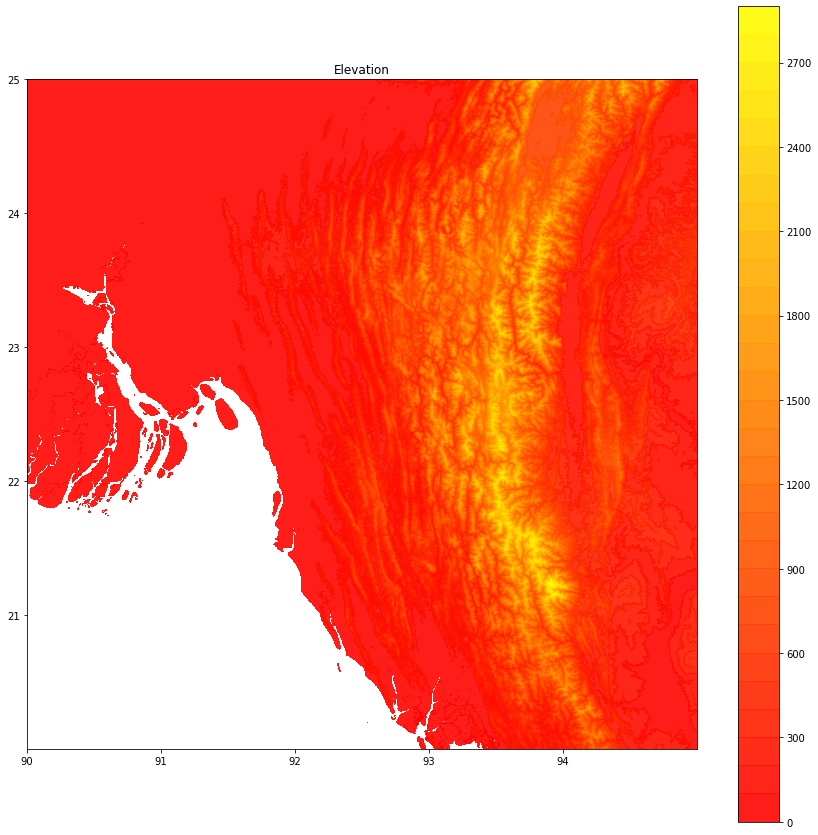

In [ ]:
pic = plt.figure(figsize=(15, 15))
sub_plot = pic.add_subplot(111)

elevation = plt.contour(x, y, data_arr, colors = colors, levels = levels, alpha=0.5)

plt.title("Elevation")

plt.colorbar(elevation)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

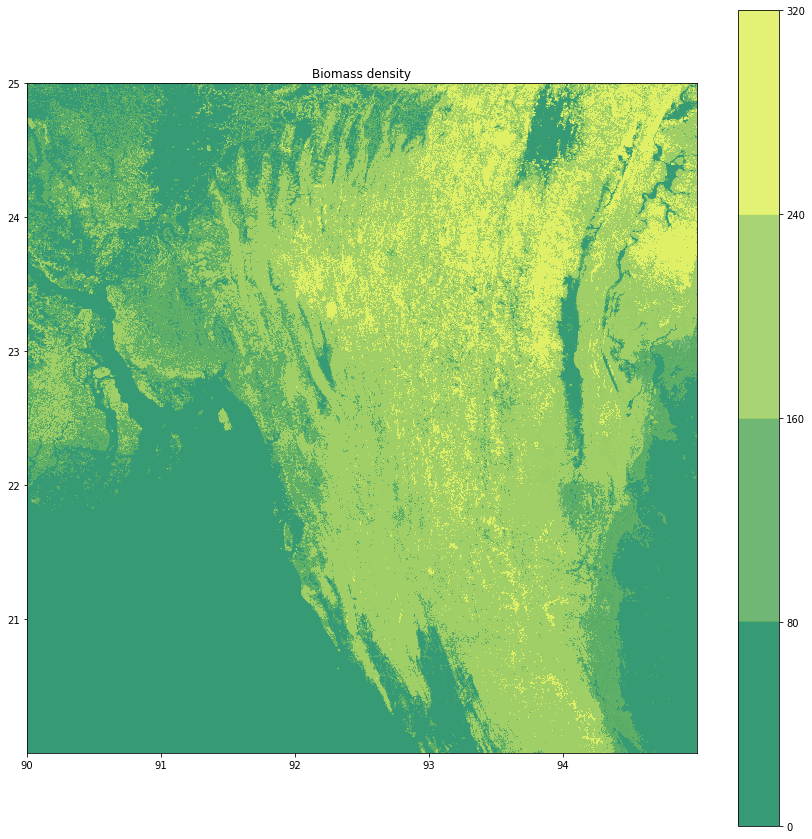

In [ ]:
pic = plt.figure(figsize=(15, 15))
sub_plot = pic.add_subplot(111)

bio_mass = plt.contourf(xT, yT, data_arrT, cmap = "summer", levels = list(range(0, 400, 80)), alpha=0.9)

plt.title("Biomass density")

plt.colorbar(bio_mass)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Relation between biomass density of the South Eastern region of Banglash and the elevation from sea level. 

NB. The more the greener, the more the biomass density. 


In [ ]:
from scipy.interpolate import griddata

In [ ]:
colors = ['blue','royalblue', 'navy','pink',  'mediumpurple',  'darkorchid',  'plum',  'm', 'mediumvioletred', 'palevioletred', 'crimson',
         'magenta','pink','red','yellow','orange', 'brown','green', 'darkgreen']

x_arr          = np.linspace(np.min(x), np.max(x), 500)
y_arr          = np.linspace(np.min(y), np.max(y), 500)

level = len(colors)

z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)

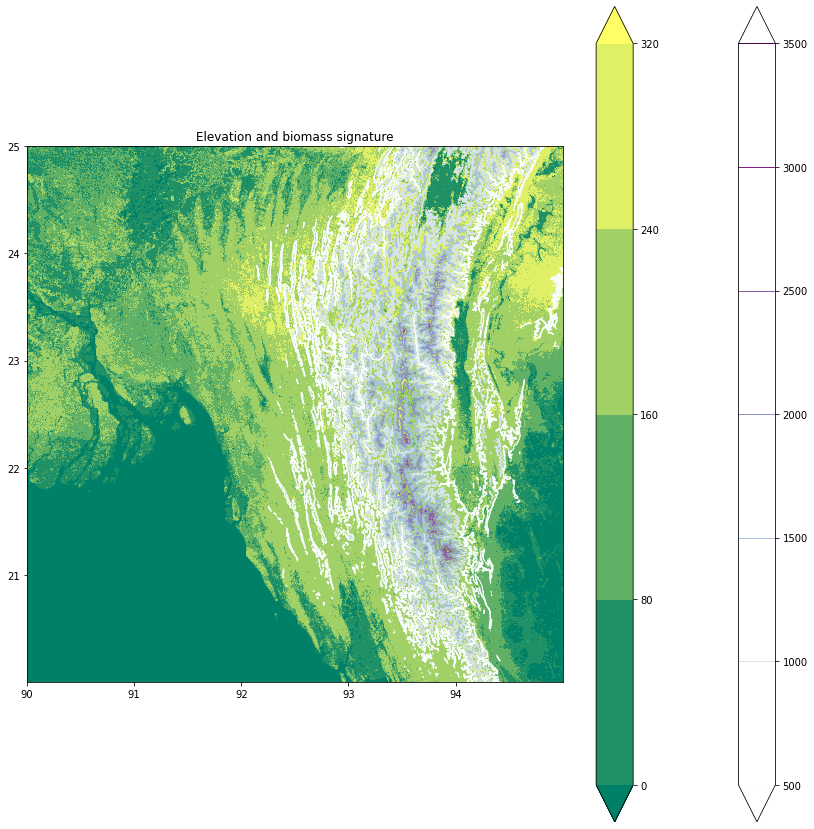

In [ ]:
pic = plt.figure(figsize=(15, 15))
sub_plot = pic.add_subplot(111)

#elevation = plt.contourf(x, y, data_arr, cmap = "autumn", levels = list(range(0, 3000, 100)), alpha=0.9, extend='both')
bio_mass = plt.contourf(xT, yT, data_arrT, cmap = "summer", levels = list(range(0, 400, 80)), extend='both')
elevation = plt.contour(x, y, np.where(data_arr < 500, 0, data_arr), levels = list(range(500, 4000, 1000)) , cmap = "BuPu", linewidths=1, extend='both')

plt.title("Elevation and biomass signature")

plt.colorbar(elevation)
plt.colorbar(bio_mass)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##Contour Plotting of Elevation data (Enhanced View)

In [ ]:
#gdal_translate -projwin xlow yhigh xhigh ylow input.tif output.tif
!gdal_translate -projwin 93.21 21.02 93.22 21.01 srtm_55_08.tif output1.tif

Input file size is 6000, 6000
0...10...20...30...40...50...60...70...80...90...100 - done.


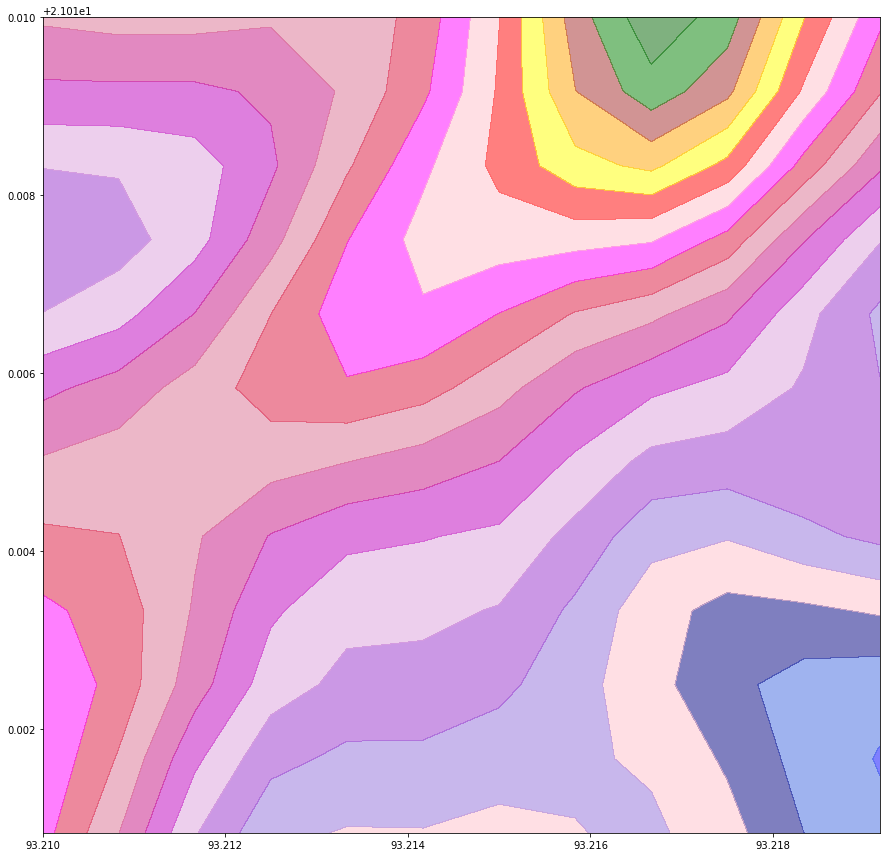

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from osgeo import gdal
from scipy.ndimage import gaussian_filter

filename = 'output1.tif'
gdal_data_ = gdal.Open(filename)

#gdal_band_ = gdal_data_.GetRasterBand(1)

#gdal_band_ = gdal_data_.GetRasterBand(1)

data_arr = gdal_data_.ReadAsArray().astype(np.float)#elevation data

data_arr[data_arr<0] = 0

row_mean = np.nanmean(data_arr, axis=1)
indice = np.where(np.isnan(data_arr))
data_arr[indice] = np.take(row_mean, indice[1])

data_arr = gaussian_filter(data_arr, sigma=1)

#data_arr = data_arr.flatten()
#elevation data
colors = ['blue','royalblue', 'navy','pink',  'mediumpurple',  'darkorchid',  'plum',  'm', 'mediumvioletred', 'palevioletred', 'crimson','magenta','pink','red','yellow','orange', 'brown','green', 'darkgreen']
#colors = ['blue','royalblue', 'navy','pink',  'mediumpurple', 'darkorchid']
levels = len(colors)

vmin = data_arr.min()
vmax = data_arr.max()

Xcolumn = gdal_data_.RasterXSize
Ycolumn = gdal_data_.RasterYSize

geotransform = gdal_data_.GetGeoTransform()
XOrigin = geotransform[0]
YOrigin = geotransform[3]

pixelWidth = geotransform[1]
pixelHeight = geotransform[5]

lons = XOrigin + np.arange(0, Xcolumn)*pixelWidth #longitude
lats = YOrigin + np.arange(0, Ycolumn)*pixelHeight #latitude

#x_arr = np.linspace(np.min(lons), np.max(lons), 50)
#y_arr = np.linspace(np.min(lats), np.max(lats), 50)
#z_data = np.linspace(np.min(data_arr), np.max(data_arr), 50)

x_mesh, y_mesh = np.meshgrid(lons, lats)

#z_mesh = griddata((lons, lats), z_data, (x_mesh, y_mesh), method='linear')

pic = plt.figure(figsize=(15, 15))
contourf = plt.contourf(x_mesh, y_mesh, data_arr, levels, alpha = 0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)
plt.show()

## 3D visualizing of elevation data

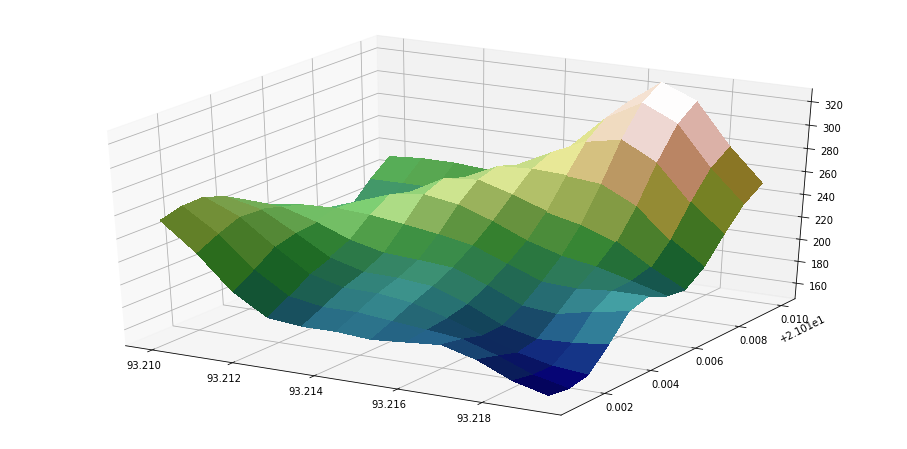

In [ ]:
#Set up plot

from matplotlib import cm
#from matplotlib.colors import LightSource


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

#ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".


#rgb = ls.shade(data_arr, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
#surf = ax.plot_surface(lons, lats, data_arr, rstride=1, cstride=1, facecolors=rgb,linewidth=0, antialiased=False, shade=False)
from matplotlib.colors import LightSource
ls = LightSource(270, 45)
rgb = ls.shade(data_arr, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')

ax.plot_surface(x_mesh, y_mesh, data_arr, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
dataframe=pd.DataFrame(data_arr)

In [ ]:
dataframe.values

array([[231.58303983, 233.7150656 , 233.50663522, 231.26281367,
        232.60432224, 243.96813452, 269.7775531 , 305.18599992,
        327.07365331, 315.27549508, 280.59858624, 252.2336424 ],
       [217.73771125, 217.94305609, 217.98267774, 221.53777752,
        231.61919305, 247.92371556, 271.27613373, 299.73050562,
        315.95119441, 302.53525635, 268.58376834, 240.87460177],
       [200.32786409, 200.94965938, 205.05710876, 218.08554201,
        238.62305643, 257.93967324, 272.66785475, 286.51365503,
        292.33297266, 277.05262707, 246.37443438, 221.79779878],
       [191.88304808, 195.51560571, 206.06090719, 226.27914686,
        249.65348913, 263.64315895, 265.18615004, 263.80354394,
        261.0090509 , 246.29079009, 220.76027348, 200.62046011],
       [200.1644315 , 206.35828898, 220.15303304, 239.92570028,
        255.93847649, 258.68017627, 249.81538193, 239.32115178,
        232.48084266, 221.7536255 , 203.32439158, 187.95898987],
       [217.6391455 , 224.15552067,

In [ ]:
fig = go.Figure(data=[go.Surface(z=dataframe.values)])

fig.update_layout(title='Elevation at 21.020000, 93.210000', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
!pip install raster2xyz

  Created wheel for raster2xyz: filename=raster2xyz-0.1.3-cp36-none-any.whl size=5965 sha256=8aef154774576a364c476a6790432af7d3d90330e9692e5b2a7d576b3c2000fc
  Stored in directory: /root/.cache/pip/wheels/df/1c/fa/7613e6765c4ad761bd90a6f505359fcb3f63848d91f3f0dd73
Successfully built raster2xyz


In [ ]:
from raster2xyz.raster2xyz import Raster2xyz
input_raster = filename # set the input file name
out_csv = filename + ".csv" # set the output file name
rtxyz = Raster2xyz(input_raster) # transform raster to x,y,z
rtxyz.translate(input_raster, out_csv) # save to a csv file

[2020-10-01 07:39:05 - INFO] - Getting geotransform and data...
[2020-10-01 07:39:05 - INFO] - Getting XYZ data...
[2020-10-01 07:39:05 - INFO] - Getting geotransformed coordinates...
[2020-10-01 07:39:05 - INFO] - Building XYZ data...
[2020-10-01 07:39:05 - INFO] - New XYZ (csv file) created...


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DEM_Bio_mass.ipynb')

--2020-10-03 15:49:28--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1301 (1.3K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.27K  --.-KB/s    in 0s      

2020-10-03 15:49:28 (53.9 MB/s) - ‘colab_pdf.py’ saved [1301/1301]

Mounted at /content/drive/
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'